In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("D:/Datasets/housing.csv", sep=",", header=0)

In [31]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Mapping to a Uniform distribution

In [32]:
# Bu dönüştürücü veriyi istenen dağılıma dönüştürür varsayılan uniform dağılımdır.

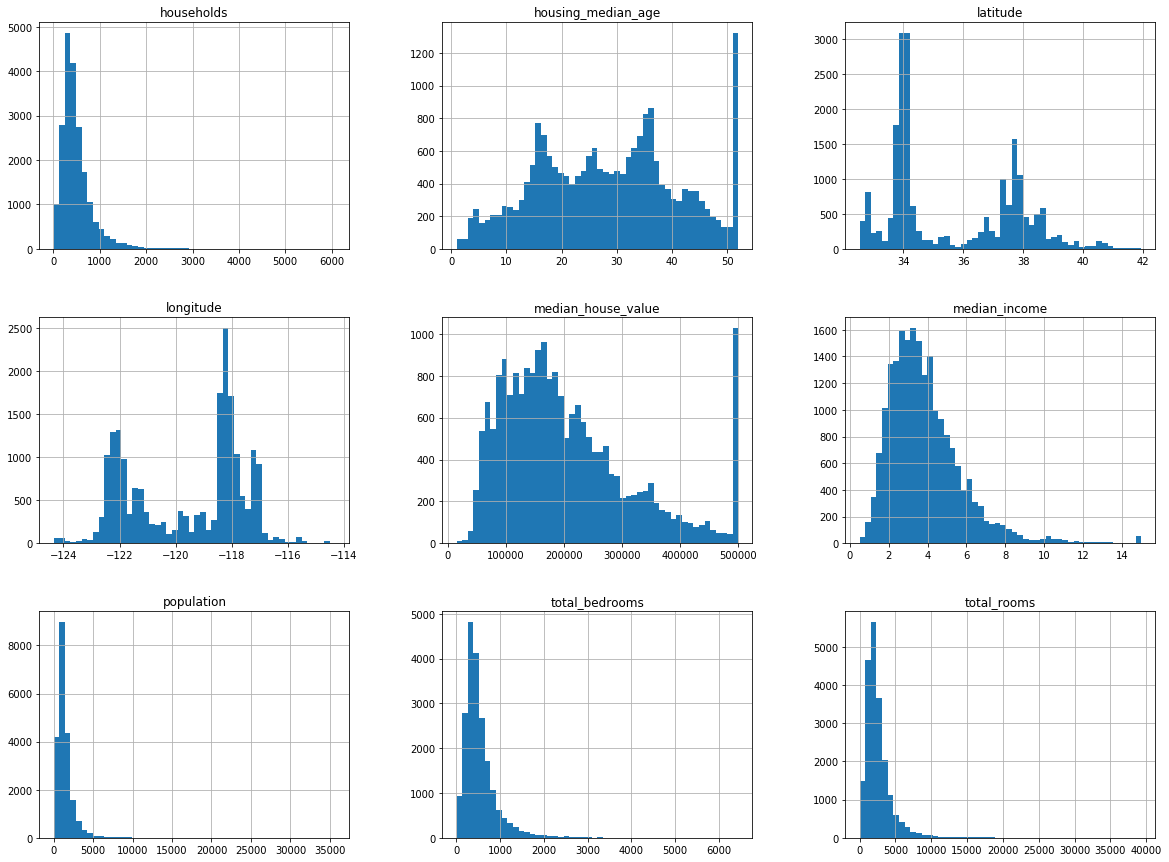

In [34]:
# Sadece nümerik değişkenler için çizilir
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [35]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [36]:
from sklearn.preprocessing import QuantileTransformer

In [37]:
qtransformer = QuantileTransformer()

In [38]:
df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']] = qtransformer.fit_transform(df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']])

In [39]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.124625,0.816316,0.819319,0.088088,0.045045,0.044845,0.050551,0.972520,0.940096,NEAR BAY
1,0.127628,0.812312,0.315816,0.965289,0.928780,0.883360,0.947542,0.972217,0.883705,NEAR BAY
2,0.121121,0.810310,1.000000,0.257257,0.091091,0.094094,0.092593,0.948467,0.877306,NEAR BAY
3,0.117117,0.810310,1.000000,0.191525,0.144645,0.120046,0.142643,0.860695,0.861867,NEAR BAY
4,0.117117,0.810310,1.000000,0.319653,0.219720,0.122122,0.208709,0.576580,0.863147,NEAR BAY


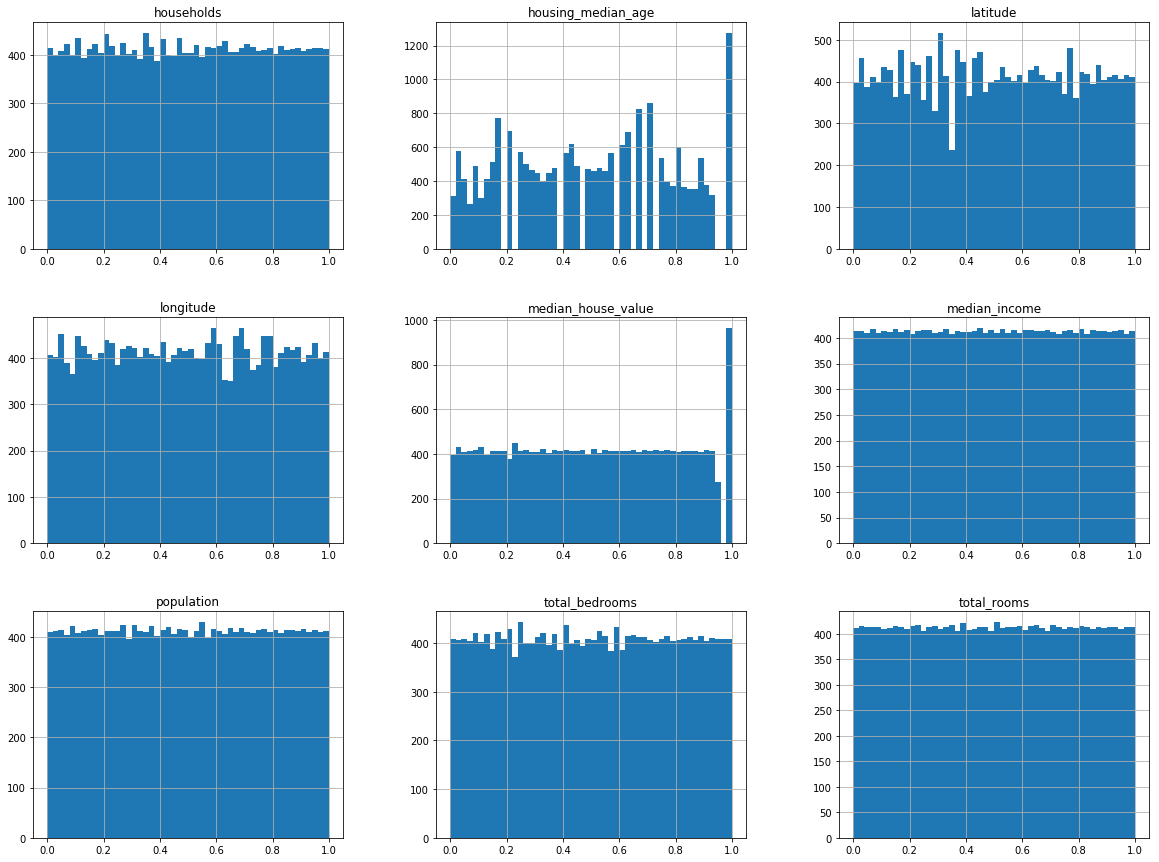

In [40]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

## Mapping to a Gaussian distribution

In [41]:
# Bazen değişkenlerin dağılımı ile ilgili bazı varsayımların karşılanması gerekir. Bunlardan birisi de normal dağılımdır. Regresyon
# varsayımlarından biri de Multivariate Normal Distribution Varsayımıdır. Şayet değişkenlerin dağılımı bu varsayımı sağlamıyorsa 
# Bunun için hazırlanmış kütüphaneleri kullanarak bu varsayımları karşılayabiliriz. Aşağıdaki histogramlardan verinin normal dağılıp
# dağılmadığına dair bir kanaat edinebiliriz.

### Box-Cox

In [42]:
from sklearn.preprocessing import PowerTransformer

In [43]:
# The Box-Cox transformation can only be applied to strictly positive data
# Bu yüzden longitude'i çıkarıyoruz
power_transformer = PowerTransformer(method='box-cox')

In [44]:
df_pow = pd.read_csv("D:/Datasets/housing.csv", sep=",", header=0)

In [46]:
df_pow[['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']] = power_transformer.fit_transform(df_pow[['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']])

In [47]:
df_pow.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,1.088986,0.975223,-1.157638,-1.568492,-1.618362,-1.517201,1.916290,1.718078,NEAR BAY
1,-122.22,1.082356,-0.566735,1.896642,1.436997,1.090062,1.634592,1.909694,1.262941,NEAR BAY
2,-122.24,1.079033,1.757447,-0.534638,-1.128271,-1.139047,-1.134194,1.601978,1.228314,NEAR BAY
3,-122.25,1.079033,1.757447,-0.713676,-0.869822,-0.999677,-0.877485,1.035967,1.168611,NEAR BAY
4,-122.25,1.079033,1.757447,-0.399654,-0.647317,-0.984697,-0.665587,0.198026,1.173649,NEAR BAY


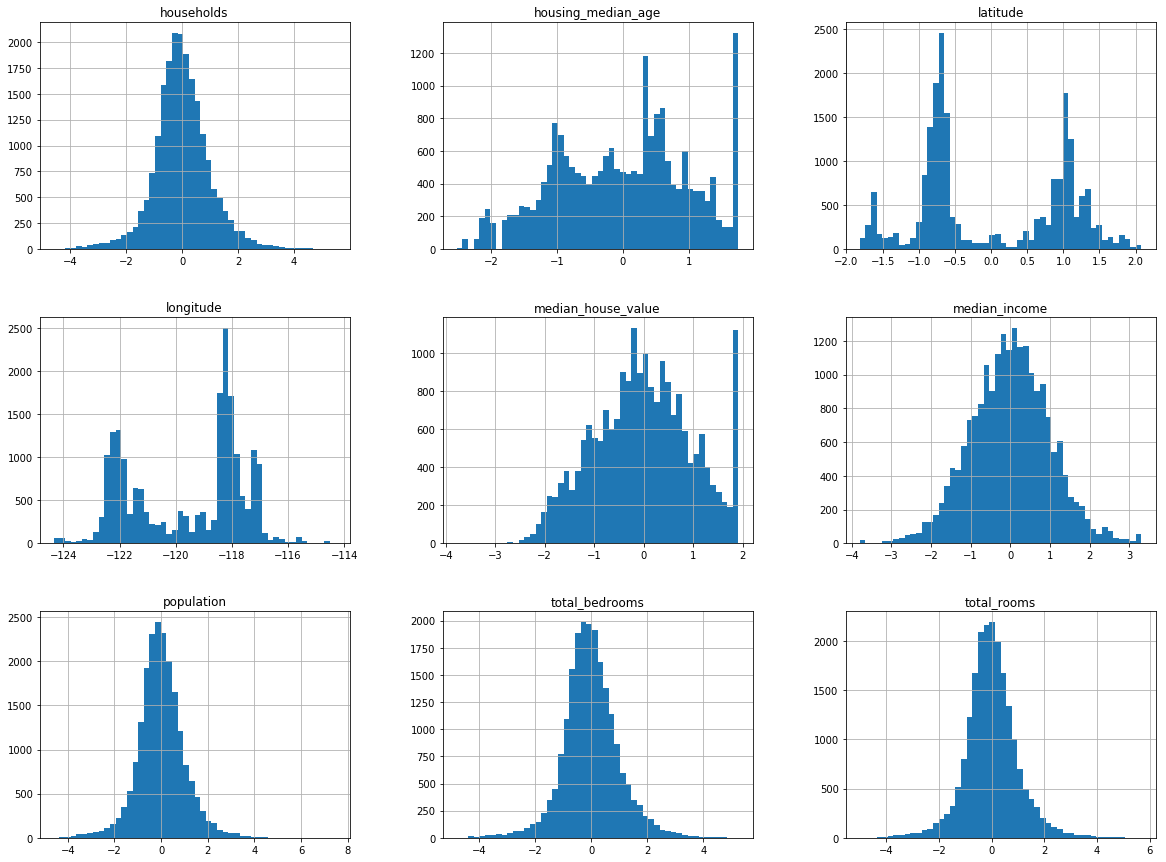

In [48]:
df_pow.hist(bins=50, figsize=(20, 15))
plt.show()

In [49]:
# Yukarıda görüldüğü gibi latidute hariç diğerlerini normal dağılıma yaklaştırdı. 

### Yeo-Johnson

In [54]:
df_yeo = pd.read_csv("D:/Datasets/housing.csv", sep=",", header=0)

In [55]:
power_transformer_yeo = PowerTransformer(method='yeo-johnson')

In [56]:
df_yeo[['longitude','latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']] = power_transformer_yeo.fit_transform(df_yeo[['longitude','latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']])

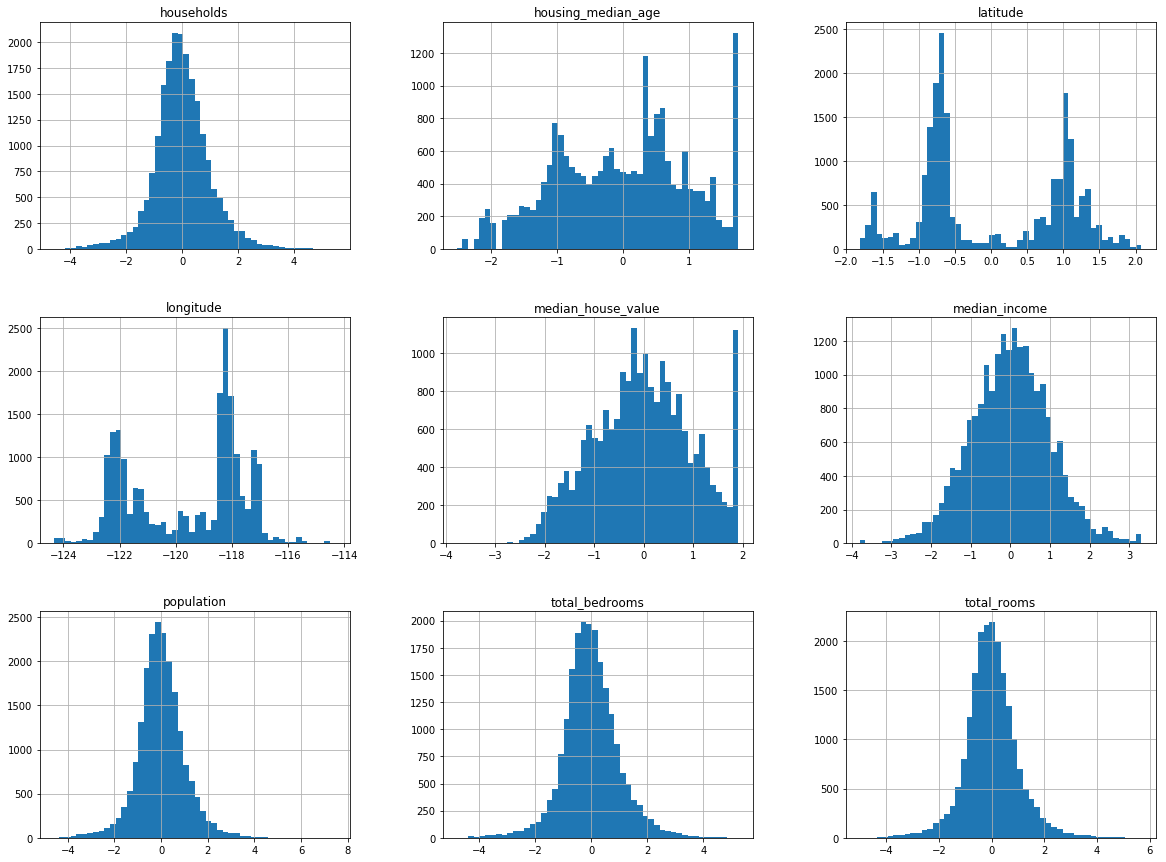

In [57]:
df_pow.hist(bins=50, figsize=(20, 15))
plt.show()